<a href="https://colab.research.google.com/github/GuptaNavdeep1983/CS688/blob/main/767_assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np

In [14]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')
    plt.xlabel("Sepal width")
    plt.ylabel("Petal length")

In [15]:
def plot_MSE(df):
  plt.plot(df['epoch'], df['mse'],marker='o', color='b')
  plt.xlabel("Iterations")
  plt.ylabel("MSE")
  plt.show()

def plot_function(X, y, weights, bias):
  X.loc[y['target'] == 0.0, 'color'] = 'red'
  X.loc[y['target'] == 1.0, 'color'] = 'blue'
  plt.scatter(X['sepal_width'], X['petal_length'], c=X['color'])
  slope = -(bias/weights[2])/(bias/weights[1])  
  intercept = -bias/weights[2]
  abline(slope, intercept)
  plt.show()

In [16]:
iris = load_iris()

iris_columns = ['sepal_len', 'sepal_width', 'petal_length', 'petal_width', 'target']
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris_columns)

df.loc[df['target'] != 0,'target'] = 1

In [17]:
from sklearn.model_selection import train_test_split
X = df[['sepal_len', 'sepal_width', 'petal_length', 'petal_width']]
y = df[['target']]
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    random_state = 10)

In [18]:
def predict(row, weights, bias):
  output = bias
  for index, weight in enumerate(weights):
    output += weight * row[index]
  return 1.0 if output > 0.0 else 0.0 

def train_weights_using_batch_gradient_descent(X_train, y_train, num_epochs, learning_rate):
  # weights for all the features 
  weights = [0,0,0,0]
  bias = 0
  index = 0
  df_plot = []
  while index < num_epochs:
    mse = 0.0
    total_gradient = weights
    for rowIndex, row in X_train.iterrows():
      predicted_value = predict(row, weights, bias)
      error = y_train.loc[rowIndex,'target'] - predicted_value
      mse += error**2
      total_gradient = [weight + (error * row[weight_index]) for weight_index, weight in enumerate(total_gradient)] 
    bias = bias + learning_rate * (mse/X_train.shape[0])
    weights = [weight + learning_rate * (total_gradient[weight_index]/X_train.shape[0]) for weight_index, weight in enumerate(weights)]
    print('>epoch=%d, lrate=%.3f, error=%.3f' % (index, learning_rate, mse/X_train.shape[0]))
    df_plot.append({mse/X_train.shape[0], index, weights[1], weights[2]})
    index = index + 1
  df_plot = pd.DataFrame(df_plot, columns=['mse', 'epoch', 'sepal_width', 'petal_length'])
  return weights, bias, df_plot

print("Creating model using training data")
(weights_using_batch_gradient_descent_train, bias_using_batch_gradient_descent_train, df_plot_train) = \
  train_weights_using_batch_gradient_descent(X_train, y_train, 10, 0.1)
print(weights_using_batch_gradient_descent_train)

print("Creating model using test data")
(weights_using_batch_gradient_descent_test, bias_using_batch_gradient_descent_test, df_plot_test) = \
  train_weights_using_batch_gradient_descent(X_test, y_test, 10, 0.1)
print(weights_using_batch_gradient_descent_test)


Creating model using training data
>epoch=0, lrate=0.100, error=0.667
>epoch=1, lrate=0.100, error=0.333
>epoch=2, lrate=0.100, error=0.333
>epoch=3, lrate=0.100, error=0.333
>epoch=4, lrate=0.100, error=0.000
>epoch=5, lrate=0.100, error=0.000
>epoch=6, lrate=0.100, error=0.000
>epoch=7, lrate=0.100, error=0.000
>epoch=8, lrate=0.100, error=0.000
>epoch=9, lrate=0.100, error=0.000
[-0.08211110236958405, -0.15231466050839254, 0.18437086543183676, 0.08920788878477641]
Creating model using test data
>epoch=0, lrate=0.100, error=0.667
>epoch=1, lrate=0.100, error=0.333
>epoch=2, lrate=0.100, error=0.333
>epoch=3, lrate=0.100, error=0.333
>epoch=4, lrate=0.100, error=0.000
>epoch=5, lrate=0.100, error=0.000
>epoch=6, lrate=0.100, error=0.000
>epoch=7, lrate=0.100, error=0.000
>epoch=8, lrate=0.100, error=0.000
>epoch=9, lrate=0.100, error=0.000
[-0.08557660299773996, -0.15191482589237892, 0.17959375888032178, 0.08430671044567081]


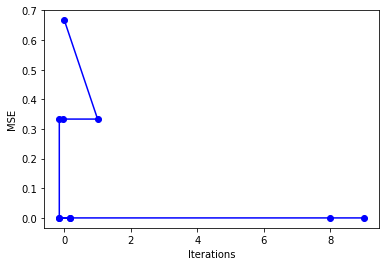

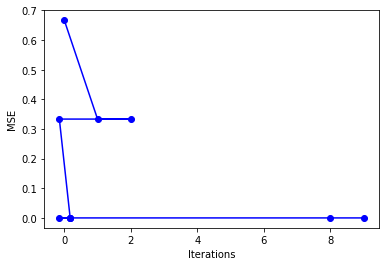

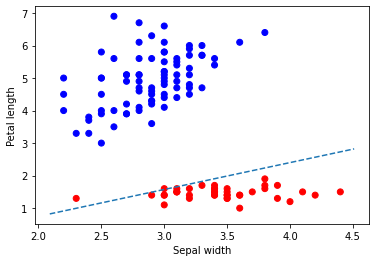

In [19]:
plot_MSE(df_plot_train)
plot_MSE(df_plot_test)
plot_function(X_train, y_train, weights_using_batch_gradient_descent_train, bias_using_batch_gradient_descent_train)

In [ ]:
def test_model(X_test, y_test, weights, bias):
  y_test['predicted'] = 0.0
  for rowIndex, row in X_test.iterrows():
    y_test.loc[rowIndex, 'predicted'] = predict(row, weights, bias)
  print(sum(y_test['predicted'] == y_test['target']))

test_model(X_test, y_test, weights_using_batch_gradient_descent_train, bias_using_batch_gradient_descent_train)

In [20]:
def train_weights_using_mini_batch_gradient_descent(X_train, y_train, batch_size, num_epochs, learning_rate):
  # weights for all the features 
  weights = [0,0,0,0]
  bias = 0
  index = 0;
  df_plot = []
  while index < num_epochs:
    mse = 0.0
    total_gradient = weights
    mini_batch = X_train.sample(n = batch_size, random_state=42)
    for rowIndex, row in mini_batch.iterrows():
      predicted_value = predict(row, weights, bias)
      error = y_train.loc[rowIndex,'target'] - predicted_value
      mse += error**2
      total_gradient = [weight + (error * row[weight_index]) for weight_index, weight in enumerate(total_gradient)] 
    bias = bias + learning_rate * (mse/mini_batch.shape[0])
    weights = [weight + learning_rate * (total_gradient[weight_index]/mini_batch.shape[0]) for weight_index, weight in enumerate(weights)]
    print('>epoch=%d, lrate=%.3f, error=%.3f' % (index, learning_rate, mse/mini_batch.shape[0]))
    df_plot.append({mse/mini_batch.shape[0], index})
    index = index + 1
  df_plot = pd.DataFrame(df_plot, columns=['mse', 'epoch'])
  return weights, bias, df_plot

print("Creating model using training data")
(weights_using_mini_batch_gradient_descent_train, bias_using_mini_batch_gradient_descent_train, df_plot_train) = \
  train_weights_using_mini_batch_gradient_descent(X_train, y_train, 12, 10, 0.1)
print(weights_using_mini_batch_gradient_descent_train)
print("Creating model using test data")
(weights_using_mini_batch_gradient_descent_test, bias_using_mini_batch_gradient_descent_test, df_plot_test) = \
  train_weights_using_mini_batch_gradient_descent(X_test, y_test, 12, 10, 0.1)
print(weights_using_mini_batch_gradient_descent_test)

Creating model using training data
>epoch=0, lrate=0.100, error=0.417
>epoch=1, lrate=0.100, error=0.583
>epoch=2, lrate=0.100, error=0.000
>epoch=3, lrate=0.100, error=0.000
>epoch=4, lrate=0.100, error=0.000
>epoch=5, lrate=0.100, error=0.000
>epoch=6, lrate=0.100, error=0.000
>epoch=7, lrate=0.100, error=0.000
>epoch=8, lrate=0.100, error=0.000
>epoch=9, lrate=0.100, error=0.000
[-0.034159497777852765, -0.100489628374952, 0.13905728206852153, 0.06480137618861832]
Creating model using test data
>epoch=0, lrate=0.100, error=0.667
>epoch=1, lrate=0.100, error=0.333
>epoch=2, lrate=0.100, error=0.333
>epoch=3, lrate=0.100, error=0.333
>epoch=4, lrate=0.100, error=0.000
>epoch=5, lrate=0.100, error=0.000
>epoch=6, lrate=0.100, error=0.000
>epoch=7, lrate=0.100, error=0.000
>epoch=8, lrate=0.100, error=0.000
>epoch=9, lrate=0.100, error=0.000
[-0.07586159509985, -0.14774982142383974, 0.16433358602965292, 0.08386432090720475]


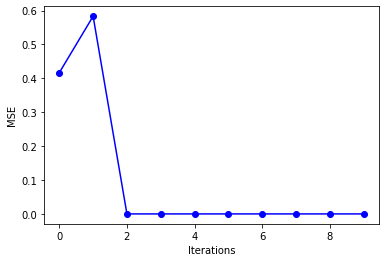

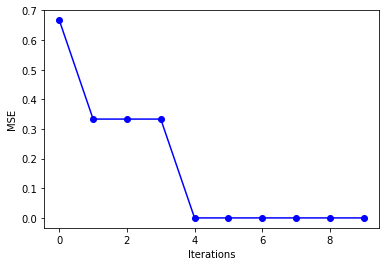

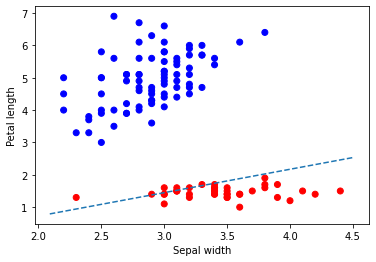

In [21]:
plot_MSE(df_plot_train)
plot_MSE(df_plot_test)
plot_function(X_train, y_train, weights_using_mini_batch_gradient_descent_train, bias_using_mini_batch_gradient_descent_train)

In [10]:
def test_model(X_test, y_test, weights, bias):
  y_test['predicted'] = 0.0
  for rowIndex, row in X_test.iterrows():
    y_test.loc[rowIndex, 'predicted'] = predict(row, weights, bias)
  print(sum(y_test['predicted'] == y_test['target']))

test_model(X_test, y_test, weights_using_mini_batch_gradient_descent, bias_using_mini_batch_gradient_descent)

30
